In [1]:
#%load_ext autoreload
#%autoreload 2

import matplotlib.pyplot as plt

from PIL import Image
from kalchas.ocr import list_available_models, load_ocr_model
from kalchas.utils import segment 
import numpy as np

In [2]:
list_available_models()

['Kalchas', 'Polyton-DB']

In [3]:
model = load_ocr_model('Kalchas')
model

TextRecognizer(width=760, height=80, num_class=225)

In [4]:
image_path = "images/test_page.png"
image  = Image.open(image_path).convert('L')

#  page segmentation 
bboxes = segment(image)

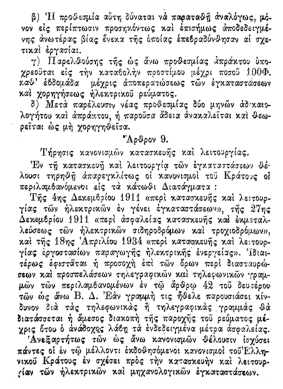

In [5]:
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
# get the bounding boxes of the segments
boxes = bboxes['boxes']

In [7]:
# loop through segments and crop lines
np_img = np.array(image)
images = [] 
for index in range(len(boxes)):

    x1, y1, x2, y2 = boxes[index]
    cropped_im = np_img[y1:y2, x1:x2,]

    dest_img = Image.fromarray(cropped_im.copy()) 
    images.append( dest_img)

    

In [8]:
def draw_image_and_text( image, text):

    image = image.resize( (700, 90), Image.Resampling.BICUBIC )

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set the text properties
    
    text = f"{text}"
    text_x = image.width + 100  # Set the x-coordinate of the text
    text_y = image.height // 2 + 20  # Set the y-coordinate of the text
    text_fontsize = 14  # Set the fontsize of the text
    text_color = '#D76777'  # Set the color of the text

    # Add the text to the right side of the image
    ax.text(text_x, text_y, text, fontsize=text_fontsize, color=text_color)

    # Remove the axis
    ax.axis('off')

    # Show the plot
    plt.show()

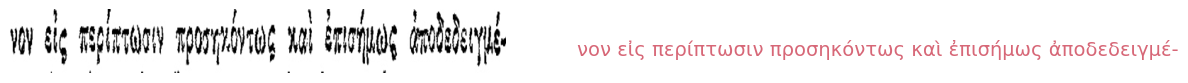

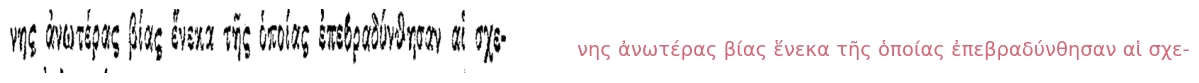

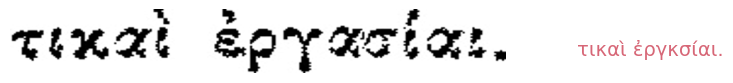

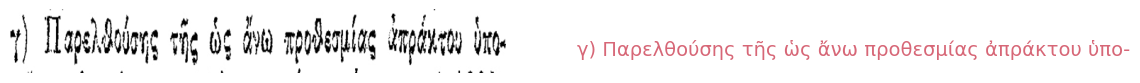

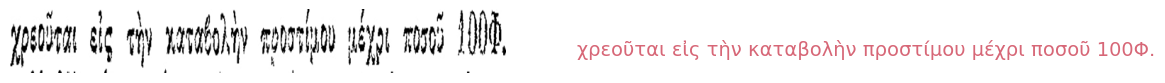

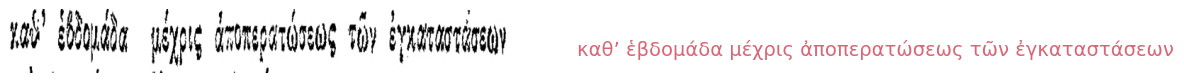

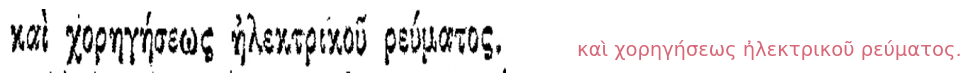

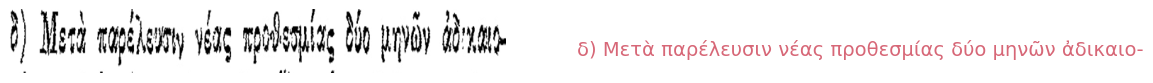

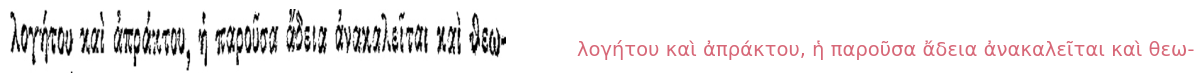

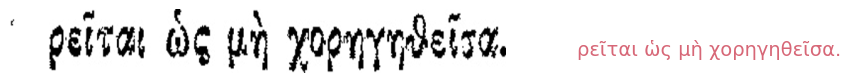

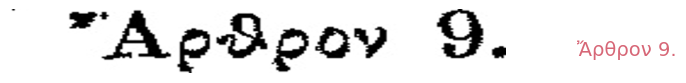

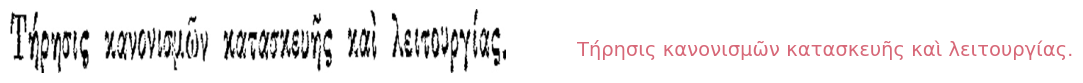

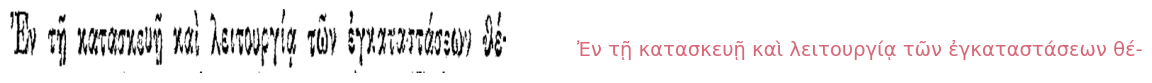

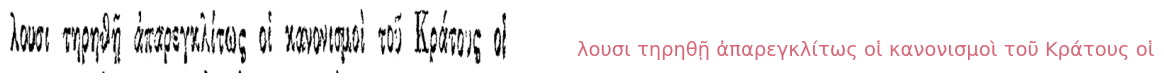

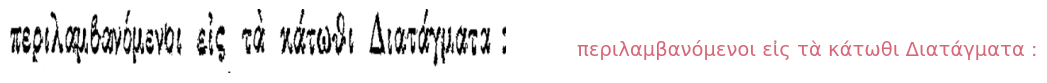

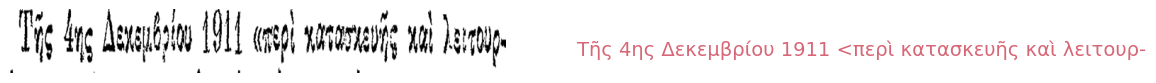

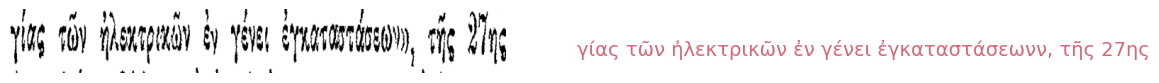

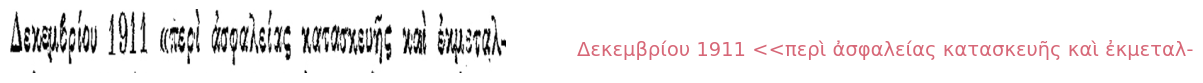

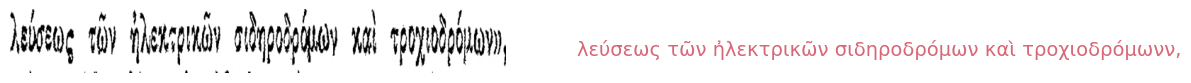

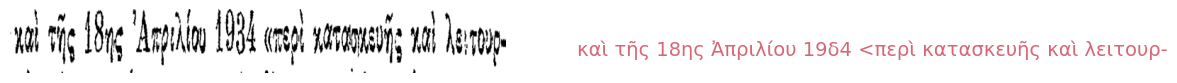

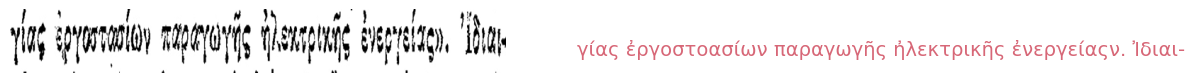

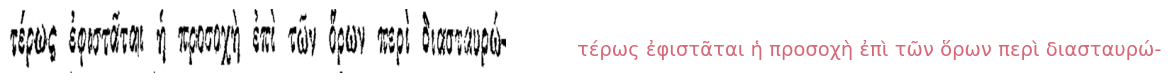

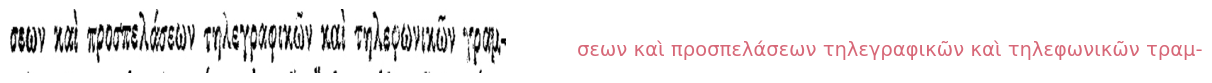

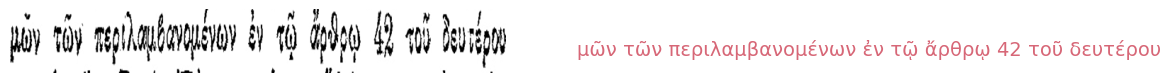

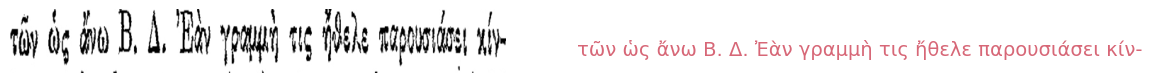

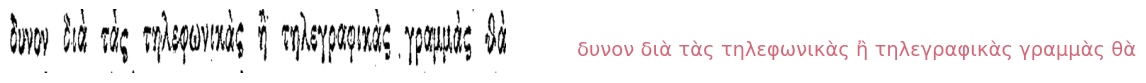

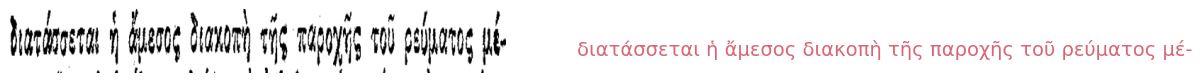

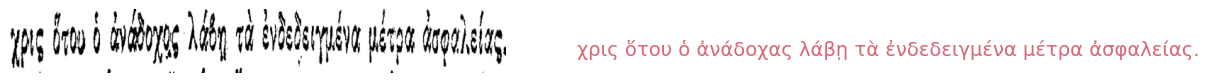

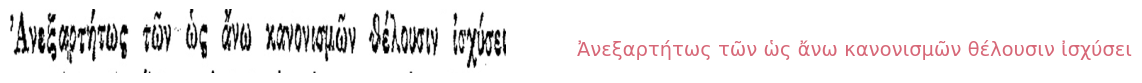

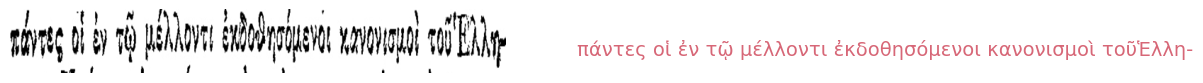

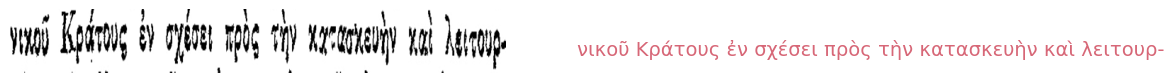

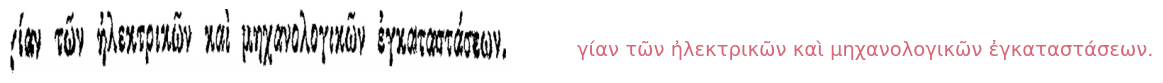

In [9]:
# ocr the extracted lines. display the recognized text side by side with the image
text= model.ocr(images)
for img, text in zip(images[1:], text[1:]):
    draw_image_and_text( img, text)
  
  